# Miary
---
obliczenie miar zagregowanych (X) dla całej sieci

korzysta z plików .csv obliczonych w pliku `obliczenia.ipynb`

In [1]:
import pandas as pd
import numpy as np

#### parametrty do scenariuszy

In [2]:
B = 120
Cs =list(range(1,90))
modes = ["PT","Car"]
aggs = ['mean','min','max','std','median', 'p_25', 'p_75']

In [3]:
def readfull(ch,B,t_k,mode, agg, filtr = 'filter', col = 'A_i_', folder = 'data//res//curve//'):
    """ otworz odpowiedni plik csv i załaduj do pandas"""
    name = "{}_{}_{}_{}_{}_".format(ch,mode,str(B),str(t_k), filtr)
    path = folder+col+name+".csv"  
    df = pd.read_csv(path, index_col=0)
    return df
#df = readfull('C',120,60,'PT',None)

In [4]:
def readone(ch,B,C,mode, agg, col = 'A_i_', folder = 'data//res//curve//'):
    """ otworz odpowiedni plik csv i załaduj do pandas"""
    name = "{}_{}_{}_{}".format(ch,mode,str(B),str(C))
    
    path = folder+col+name+".csv"  
    df = pd.read_csv(path, index_col=0)
    if col == 'WA_i_':
        col = 'WA_ji_'
        return df[col+name[2:]+agg]
    return df[col+name+agg]

def X(ch,B,C, col = 'A_i_'):
    """ otworz dla pliki csv i oblicz miatę X dla odpowiednich parametrów"""
    a = readone(ch,B,C,modes[0],aggs[0], col)
    b = readone(ch,B,C,modes[1],aggs[0], col)
    i = a.index.union(b.index)
    a = a.reindex(i).fillna(0)
    b = b.reindex(i).fillna(0)
    df =  pd.DataFrame((a - b)/(a  + b ))
    df.columns=['mean']
    for agg in aggs[1:]:
        a = readone(ch,B,C,modes[0],agg)
        b = readone(ch,B,C,modes[1],agg)
        i = a.index.union(b.index)
        a = a.reindex(i).fillna(0)
        b = b.reindex(i).fillna(0)
        df[agg] = (a - b)/(a  + b )
    return df
    

#### pętla dla wszysctkich scenariuszy 
* załaduj pliki
* oblicz miarę
* zapisz plik

In [5]:
folder = 'data//res//curve//'
for ch in ["C","H"]:
    for C in Cs:            
            name = "{}_{}_{}".format(ch,str(B),str(C))
            path = folder+'X_'+name+".csv" 
            X(ch,B,C).to_csv(path, sep = ";")  

### 4.	Regional modal accessibility disparity, unweighted

In [22]:
df = readone("C",B,1, 'PT', 'mean').to_frame()
df.columns = ['1']
for C in Cs[1:]:
    df[str(C)] = readone("C",B,C, 'PT', 'mean')
df.to_csv('data//res//curve//zbiorcze_C_PT.csv') 
df = readone("H",B,1, 'PT', 'mean').to_frame()
df.columns = ['1']
for C in Cs[1:]:
    df[str(C)] = readone("H",B,C, 'PT', 'mean')
df.to_csv('data//res//curve//zbiorcze_H_PT.csv') 
df = readone("C",B,1, 'Car', 'mean').to_frame()
df.columns = ['1']
for C in Cs[1:]:
    df[str(C)] = readone("C",B,C, 'Car', 'mean')
df.to_csv('data//res//curve//zbiorcze_C_Car.csv') 
df = readone("H",B,1, 'Car', 'mean').to_frame()
df.columns = ['1']
for C in Cs[1:]:
    df[str(C)] = readone("H",B,C, 'Car', 'mean')
df.to_csv('data//res//curve//zbiorcze_H_Car.csv') 

In [11]:
res = pd.DataFrame(columns=['ch','B','C', 'agg', 'PT','Car','X'])
for ch in ["C","H"]:
    for C in Cs:
            for agg in aggs:                        
                        #try:
                        PT = readone(ch,B,C, 'PT', agg).mean()
                        Car = readone(ch,B,C, 'Car',agg).mean()
                        X = (PT - Car)/(PT + Car)
                        res.loc[res.shape[0]+1]=[ch,B,C, agg,PT, Car,X]
                        #except:
                        print(ch,B,C,agg)
res.to_csv('data//res//curve//zbiorcze.csv')

('C', 120, 1, 'mean')
('C', 120, 1, 'min')
('C', 120, 1, 'max')
('C', 120, 1, 'std')
('C', 120, 1, 'median')
('C', 120, 1, 'p_25')
('C', 120, 1, 'p_75')
('C', 120, 2, 'mean')
('C', 120, 2, 'min')
('C', 120, 2, 'max')
('C', 120, 2, 'std')
('C', 120, 2, 'median')
('C', 120, 2, 'p_25')
('C', 120, 2, 'p_75')
('C', 120, 3, 'mean')
('C', 120, 3, 'min')
('C', 120, 3, 'max')
('C', 120, 3, 'std')
('C', 120, 3, 'median')
('C', 120, 3, 'p_25')
('C', 120, 3, 'p_75')
('C', 120, 4, 'mean')
('C', 120, 4, 'min')
('C', 120, 4, 'max')
('C', 120, 4, 'std')
('C', 120, 4, 'median')
('C', 120, 4, 'p_25')
('C', 120, 4, 'p_75')
('C', 120, 5, 'mean')
('C', 120, 5, 'min')
('C', 120, 5, 'max')
('C', 120, 5, 'std')
('C', 120, 5, 'median')
('C', 120, 5, 'p_25')
('C', 120, 5, 'p_75')
('C', 120, 6, 'mean')
('C', 120, 6, 'min')
('C', 120, 6, 'max')
('C', 120, 6, 'std')
('C', 120, 6, 'median')
('C', 120, 6, 'p_25')
('C', 120, 6, 'p_75')
('C', 120, 7, 'mean')
('C', 120, 7, 'min')
('C', 120, 7, 'max')
('C', 120, 7, 'std

('C', 120, 53, 'mean')
('C', 120, 53, 'min')
('C', 120, 53, 'max')
('C', 120, 53, 'std')
('C', 120, 53, 'median')
('C', 120, 53, 'p_25')
('C', 120, 53, 'p_75')
('C', 120, 54, 'mean')
('C', 120, 54, 'min')
('C', 120, 54, 'max')
('C', 120, 54, 'std')
('C', 120, 54, 'median')
('C', 120, 54, 'p_25')
('C', 120, 54, 'p_75')
('C', 120, 55, 'mean')
('C', 120, 55, 'min')
('C', 120, 55, 'max')
('C', 120, 55, 'std')
('C', 120, 55, 'median')
('C', 120, 55, 'p_25')
('C', 120, 55, 'p_75')
('C', 120, 56, 'mean')
('C', 120, 56, 'min')
('C', 120, 56, 'max')
('C', 120, 56, 'std')
('C', 120, 56, 'median')
('C', 120, 56, 'p_25')
('C', 120, 56, 'p_75')
('C', 120, 57, 'mean')
('C', 120, 57, 'min')
('C', 120, 57, 'max')
('C', 120, 57, 'std')
('C', 120, 57, 'median')
('C', 120, 57, 'p_25')
('C', 120, 57, 'p_75')
('C', 120, 58, 'mean')
('C', 120, 58, 'min')
('C', 120, 58, 'max')
('C', 120, 58, 'std')
('C', 120, 58, 'median')
('C', 120, 58, 'p_25')
('C', 120, 58, 'p_75')
('C', 120, 59, 'mean')
('C', 120, 59, 'm

('H', 120, 15, 'p_75')
('H', 120, 16, 'mean')
('H', 120, 16, 'min')
('H', 120, 16, 'max')
('H', 120, 16, 'std')
('H', 120, 16, 'median')
('H', 120, 16, 'p_25')
('H', 120, 16, 'p_75')
('H', 120, 17, 'mean')
('H', 120, 17, 'min')
('H', 120, 17, 'max')
('H', 120, 17, 'std')
('H', 120, 17, 'median')
('H', 120, 17, 'p_25')
('H', 120, 17, 'p_75')
('H', 120, 18, 'mean')
('H', 120, 18, 'min')
('H', 120, 18, 'max')
('H', 120, 18, 'std')
('H', 120, 18, 'median')
('H', 120, 18, 'p_25')
('H', 120, 18, 'p_75')
('H', 120, 19, 'mean')
('H', 120, 19, 'min')
('H', 120, 19, 'max')
('H', 120, 19, 'std')
('H', 120, 19, 'median')
('H', 120, 19, 'p_25')
('H', 120, 19, 'p_75')
('H', 120, 20, 'mean')
('H', 120, 20, 'min')
('H', 120, 20, 'max')
('H', 120, 20, 'std')
('H', 120, 20, 'median')
('H', 120, 20, 'p_25')
('H', 120, 20, 'p_75')
('H', 120, 21, 'mean')
('H', 120, 21, 'min')
('H', 120, 21, 'max')
('H', 120, 21, 'std')
('H', 120, 21, 'median')
('H', 120, 21, 'p_25')
('H', 120, 21, 'p_75')
('H', 120, 22, 'm

('H', 120, 67, 'max')
('H', 120, 67, 'std')
('H', 120, 67, 'median')
('H', 120, 67, 'p_25')
('H', 120, 67, 'p_75')
('H', 120, 68, 'mean')
('H', 120, 68, 'min')
('H', 120, 68, 'max')
('H', 120, 68, 'std')
('H', 120, 68, 'median')
('H', 120, 68, 'p_25')
('H', 120, 68, 'p_75')
('H', 120, 69, 'mean')
('H', 120, 69, 'min')
('H', 120, 69, 'max')
('H', 120, 69, 'std')
('H', 120, 69, 'median')
('H', 120, 69, 'p_25')
('H', 120, 69, 'p_75')
('H', 120, 70, 'mean')
('H', 120, 70, 'min')
('H', 120, 70, 'max')
('H', 120, 70, 'std')
('H', 120, 70, 'median')
('H', 120, 70, 'p_25')
('H', 120, 70, 'p_75')
('H', 120, 71, 'mean')
('H', 120, 71, 'min')
('H', 120, 71, 'max')
('H', 120, 71, 'std')
('H', 120, 71, 'median')
('H', 120, 71, 'p_25')
('H', 120, 71, 'p_75')
('H', 120, 72, 'mean')
('H', 120, 72, 'min')
('H', 120, 72, 'max')
('H', 120, 72, 'std')
('H', 120, 72, 'median')
('H', 120, 72, 'p_25')
('H', 120, 72, 'p_75')
('H', 120, 73, 'mean')
('H', 120, 73, 'min')
('H', 120, 73, 'max')
('H', 120, 73, 'st

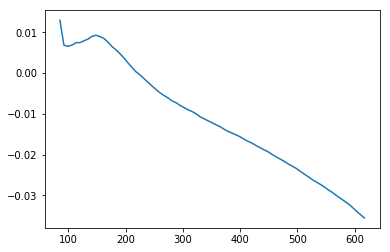

In [28]:
res[(res['agg']=='mean') & (res.ch == 'C')].X.plot()

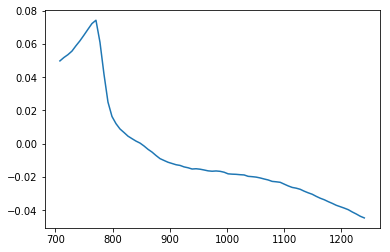

In [29]:
res[(res['agg']=='mean') & (res.ch == 'H')].X.plot()

----